<a href="https://colab.research.google.com/github/elainedias16/TCC/blob/main/Word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embeddings


## Motivação

*Word embedding* **(adicionar citação)** é uma técnica de  Processamento de Linguagem Natural (NLP) que consiste em representar palavras como vetores numéricos. Esta representação é necessária porque alguns algoritmos de inteligência artifical são capazes de manipular apenas números. Dessa forma, gerar *word embeddings* é essencial para criar a entrada de modelos de NLP, como tradução automática, chatbots, análise de sentimentos, sumarização, entre outros.

Anteriormente, na tarefa de classificação, foram vistas três formas de representar palavras por meio de vetores: One-hot-enconding , Representação baseada em contagem, isto é, a Frequência da Palavra e TF-IDF. A diferença entre tais métodos e os word embeddings, é que os mesmos são capazes de captar a relação entre palavras de forma mais profunda. Dessa forma, estudar word embedding é essencial para utilizar, criar e implementar modelos de NLP na qual a base de dados textual esteja melhor representada matematicamente.

Este laboratório irá demonstrar como transformar palavras em word embeddings usando a biblioteca XYZ e realizará uma análise qualitativa dos embeddings para demonstrar que as distâncias entre os embeddings está correlacionada com a relação semântica entre as palavras (e.g., rei e rainha estão mais próximos no espaço que rei e futebol).

## Fundamentação teórica

Os Word embeddings são uma técnica de (NLP) que consiste em representar palavras como vetores numéricos, tipicamente em um espaço vetorial de alta dimensão. Como ilustrado na Figura 1 para representar a palavra *MULHER* , uma das coordenadas poderia estar relacionada à uma escala gênero variando de 1 a -1. Assim, quanto mais próximo de Feminino, mais próximo de 1 e quanto mais próximo de masculino mais próximo de -1.

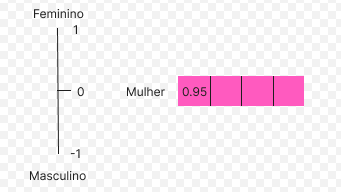

É possível perceber que apenas essa dimensão não é suficiente para captar o significado da palavra *MULHER*, por isso é preciso introduzir mais dimensões nesse vetor para melhor representar *MULHER*. Assim, cada dimensão no vetor representa uma característica ou propriedade da palavra. Dessa forma, é possível escolher quantas dimensões o vetor terá, diferentemente das técnicas já aprendidas, nas quais o tamanho do vetor era necessariamente o tamanho do vocabulário.

É intuitivo perceber que para representar bem as palavras do vocabulário, é necesário mais dimensões. Dessa forma, é preciso preencher cada dimensão do vetor de cada palavra com um valor que seja representativo o suficiente para a característica em questão. Por causa disso, surgiram algoritmos para gerar os embedding de palavras. Os mais famosos são:

* Word2vec
* GloVe
* FastText

Foi escolhido utilizar o algoritmo Word2Vec para gerar os word embeddings. O Word2Vec possui duas variantes, o CBOW (Continuous Bag-of-Words) e o Skip-grams.


## CBOW

**[Revisar Conceitualmente]** Considere uma palavra de referência e as palavras à esquerda e à direita desta. O conjunto de palavras ao redor da palavra de referência é chamado de janela de contexto da palavra. No algoritmo CBOW, a palavra de referência é "escondida" e o algoritmo tenta adivinhar a palavra com base naquelas que estão ao redor. Programaticamente, um modelo de aprendizado de máquina prediz para cada palavra no dicionário, a probabilidade dela ser a palavra de referência. Este processo é repetido para palavras escolhidas aleatoriamente em um dataset de textos. Ao final do processo, o algoritmo irá construir representações que indiquem que a palavra BOLA, por exemplo, tem maior probabilidade próxima a termos como JOGADOR, TIME, GOL e OLIMPÍADA do que de termos como POLICIAL, ATRIZ e POLÍTICA.

**[Para preencher: Adicionar uma frase explicando em alto nível como o embedding é criado pelo algoritmo]**

Inicialmente, é definido o tamanho da janela de contexto e os contextos são definidos. Após isso, são criados vetores one-hot para cada palavra do vocabulário. Posteriormente, uma matriz de embeddings de entrada (W) e uma matriz de embeddings de saída (W') são inicializadas com valores aleatórios.
Para cada contexto definido previamente, os vetores one-hot das palavras do contexto são multiplicados por W para gerar os embeddings.Em seguida, a média desses embddings é calculada, multiplicada pela matriz W' e utilizada como entrada para uma camada de softmax. A saída do softmax é um vetor de probabilidade, que mostra a probabilidade de cada palavra do vocabulário ser a palavra target. A loss é calculada utilizando a entropia cruzada entre o vetor de probabilidades e o vetor one-hot da palavra target. Os pesos da matriz de embeddings W e W' são atualizados para minimizar a loss.

###Exemplo:
Dada a sentença: O gato subiu na árvore.

Vocabulário : { O , gato, subiu , na , árvore }

Dimensão :  5

**Vetores one-hot :**

$v_O$ -> [ 1 , 0, 0, 0, 0]

$v_{gato}$ -> [0, 1, 0, 0, 0]

$v_{subiu}$ -> [0, 0, 1, 0, 0]

$v_{na}$ -> [0, 0, 0, 1, 0]

$v_{arvore}$ -> [0, 0, 0, 0 , 1]

Tamanho da janela de contexto : 2

**Pares de treinamente:**

(O, gato) -> subiu

(gato, subiu) -> na

(subiu, na) -> árvore

Note que é possível criar diversos pares de treinamento, deslocando a janela de contexto. Isso fica a critério do programador.

**Inicialização da matriz de embeddings:**

A matriz de embeddings $W$ terá a mesma quantidade de linhas do tamanho no vocabulário e número de colunas arbitrário. Para esse exemplo, foi escolhido o número de colunas como 3. Assim, $W$ é uma matriz 5x3. Já a matriz $W'$ será 3x5. Ambas são inicilizadas aleatoriamente


**Para obter os emebeddings de contexto**:

Embeddings do primeiro contexto:

(O, gato) -> subiu

 $h_O = W^T \cdot v_o $

$ h_{\text{gato}} = W^T \cdot v_{\text{gato}} $

Embeddings do segundo contexto:

...


**Média dos embeddings:**

$ x = \frac{h_O + h_{\text{gato}} + h_{\text{na}} + h_{\text{árvore}}}{4} $

**Multiplicação pela matriz de saída:**

$z = W'^T \cdot x$

**Aplicação do sfotmax :**

$ŷ = softmax(z)$


**Cálculo da Loss** :

A função de perda usada no CBOW é a entropia cruzada entre $ŷ$ e o vetor da palavra target, nesse caso, o vetor da palavra subiu, [0, 0, 1, 0, 0] . Esta função de perda equivale a tratar o problema de predição de palavra como um problema de classificação em que as classes possíveis são as palavras do dicionário.

**Atualização dos pesos**:

Cálculos de gradiente e atualição dos pesos de $W$ e $W'$.


A arquitetura do CBOW é mostrada abaixo. Na imagem é possível observar a entrada, que são as palavras do contexto e a saída, que é a palavra target.

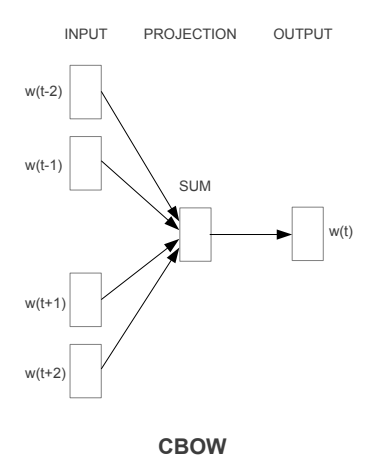

Esse processo de treinamento é feito iterativamente até atingir certos critérios de loss ou épocas ou algum outro critério. Após o treinamento, os embeddings do vocabulário estão na matriz $W$.


## Skip-gram

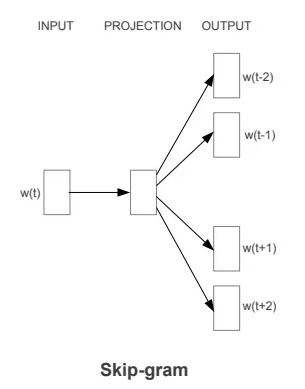

Figura extraída de <nome do artigo>

Diante do exposto, é possível perceber que cada vocabulário preenche um espaço vetorial. Sendo as palavras vetores, é possível realizar cálculos vetoriais com as mesmas.

# Resultados Esperados

# Referências

@article{wang2020survey,
  title={A survey of word embeddings based on deep learning},
  author={Wang, Shirui and Zhou, Wenan and Jiang, Chao},
  journal={Computing},
  volume={102},
  number={3},
  pages={717--740},
  year={2020},
  publisher={Springer}
}


https://edrone.me/pt/blog/o-que-e-word2vec


https://arxiv.org/pdf/1301.3781

https://towardsdatascience.com/skip-gram-nlp-context-words-prediction-algorithm-5bbf34f84e0c

https://medium.com/turing-talks/word-embedding-fazendo-o-computador-entender-o-significado-das-palavras-92fe22745057

